# S12 T02: Tasca de web scraping

**Objectius:**
 - Web scraping
 - Documentar dades recollides amb web scraping

## Nivell 1 - Exercici 1
**Realitza web scraping d'una pàgina de la borsa de Madrid (https://www.bolsamadrid.es) utilitzant BeautifulSoup i Selenium.**

Biography: https://realpython.com/beautiful-soup-web-scraper-python/


We will use BautifulSoup to extract the IBEX35 companies list and their historical stock values.

Then we will be able to select one of the companies and using Selenium we will get the table of the historical stock values of that company.

In [1]:
#! python -m pip install requests
#! python -m pip install beautifulsoup4
#! pip install selenium

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from bs4 import BeautifulSoup

In [4]:
URL = "https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser") #Check website parser

#soup.original_encoding

In [5]:
# Get all the results of the table "Precios de la sesión"
results = soup.find(id="ctl00_Contenido_tblAcciones")
#print(results.prettify())

In [6]:
# Reduce the search to the companies names and their 'Ficha Valor' website
table_companies = results.find_all("td", class_="DifFlSb")

for companies in table_companies:  
    print(companies, end="\n")

<td align="left" class="DifFlSb"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0132105018">ACERINOX</a></td>
<td align="left" class="DifFlSb"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0167050915">ACS</a></td>
<td align="left" class="DifFlSb"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0109067019">AMADEUS</a></td>
<td align="left" class="DifFlSb"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=LU1598757687">ARCELORMIT.</a></td>
<td align="left" class="DifFlSb"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0113900J37">B.SANTANDER</a></td>
<td align="left" class="DifFlSb"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0113860A34">BA.SABADELL</a></td>
<td align="left" class="DifFlSb"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0113211835">BBVA</a></td>
<td align="left" class="DifFlSb"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0140609019">CAIXABANK</a></td>
<td align="left" class="DifFlSb"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0105

In [7]:
links = results.find_all("a") # Get the <a href> info

IBEX_companies=[]
link_url =[]
for link in links:
    IBEX_companies.append(link.contents[0]) #List of the IBEX companies
    
    # Modify the root to get the historical info ('InfHistorica') instead of the 'Ficha Valor'
    # link["href"][-12:] - To select only the companies ISIN code
    link_url.append('https://www.bolsamadrid.es/esp/aspx/Empresas/InfHistorica.aspx?ISIN=' + link["href"][-12:]) 

# Dictionary that contain company name and it´s historical info
companies_dict = dict(zip(IBEX_companies, link_url))

companies_dict

{'ACCIONA': 'https://www.bolsamadrid.es/esp/aspx/Empresas/InfHistorica.aspx?ISIN=ES0125220311',
 'ACERINOX': 'https://www.bolsamadrid.es/esp/aspx/Empresas/InfHistorica.aspx?ISIN=ES0132105018',
 'ACS': 'https://www.bolsamadrid.es/esp/aspx/Empresas/InfHistorica.aspx?ISIN=ES0167050915',
 'AENA': 'https://www.bolsamadrid.es/esp/aspx/Empresas/InfHistorica.aspx?ISIN=ES0105046009',
 'ALMIRALL': 'https://www.bolsamadrid.es/esp/aspx/Empresas/InfHistorica.aspx?ISIN=ES0157097017',
 'AMADEUS': 'https://www.bolsamadrid.es/esp/aspx/Empresas/InfHistorica.aspx?ISIN=ES0109067019',
 'ARCELORMIT.': 'https://www.bolsamadrid.es/esp/aspx/Empresas/InfHistorica.aspx?ISIN=LU1598757687',
 'B.SANTANDER': 'https://www.bolsamadrid.es/esp/aspx/Empresas/InfHistorica.aspx?ISIN=ES0113900J37',
 'BA.SABADELL': 'https://www.bolsamadrid.es/esp/aspx/Empresas/InfHistorica.aspx?ISIN=ES0113860A34',
 'BANKINTER': 'https://www.bolsamadrid.es/esp/aspx/Empresas/InfHistorica.aspx?ISIN=ES0113679I37',
 'BBVA': 'https://www.bolsamadr

In [8]:
print('IBEX35 companies list')
print('=====================')
for company in IBEX_companies:
    print (company)

IBEX35 companies list
ACCIONA
ACERINOX
ACS
AENA
ALMIRALL
AMADEUS
ARCELORMIT.
B.SANTANDER
BA.SABADELL
BANKINTER
BBVA
CAIXABANK
CELLNEX
CIE AUTOMOT.
ENAGAS
ENDESA
FERROVIAL
FLUIDRA
GRIFOLS CL.A
IAG
IBERDROLA
INDITEX
INDRA A
INM.COLONIAL
MAPFRE
MELIA HOTELS
MERLIN
NATURGY
PHARMA MAR
R.E.C.
REPSOL
ROVI
SIEMENS GAME
SOLARIA
TELEFONICA


In [9]:
selected_company=input('Select one of the above companies to see their stock historical info: ')

Select one of the above companies to see their stock historical info: ROVI


In [10]:
print (selected_company, ' stock historical information available on this website:\n', companies_dict[selected_company])

URL_company = companies_dict[selected_company]
page_company = requests.get(URL_company)

ROVI  stock historical information available on this website:
 https://www.bolsamadrid.es/esp/aspx/Empresas/InfHistorica.aspx?ISIN=ES0157261019


In [11]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys

# To avoid the chrome broswer opening
chrome_options = Options()
chrome_options.add_argument("--headless")

driver = webdriver.Chrome(chrome_options=chrome_options)
driver.get(URL_company)

# To know the number of columns in the table
cols=len(driver.find_elements_by_xpath("/html/body/div[1]/table/tbody/tr[4]/td[2]/div[1]/form/div[7]/table/tbody/tr[2]/td"))

# To know the number of rows in the table
rows=len(driver.find_elements_by_xpath("/html/body/div[1]/table/tbody/tr[4]/td[2]/div[1]/form/div[7]/table/tbody/tr"))

# save the columns names
columns = [element.text for element in driver.find_elements_by_xpath("/html/body/div[1]/table/tbody/tr[4]/td[2]/div[1]/form/div[7]/table/tbody/tr/th")]

# export the table values
table = []
for i in range(2, rows+1):
    row = []
    for j in range(1, cols+1):
        a = driver.find_elements_by_xpath("/html/body/div[1]/table/tbody/tr[4]/td[2]/div[1]/form/div[7]/table/tbody/tr["+str(i)+"]/td["+str(j)+"]")
        b = [element.text for element in a]
        row.append(b[0]) # find elemnts will create a list of 1 value. by using [0] we select the value and don´t append the list
    
    table.append(row)

history_df = pd.DataFrame(table, columns=columns)
print ('INFORMACIÓN HISTORICA DE ', selected_company)
history_df


INFORMACIÓN HISTORICA DE  ROVI


,Fecha,Cierre,Referencia,Volumen,Efectivo,Último,Máximo,Mínimo,Medio
0,02/02/2022,"67,8000","66,6000",119.962,"8.195.020,90","67,8000","69,4000","67,1000","68,3135"
1,03/02/2022,"65,6000","67,8000",78.040,"5.185.117,90","65,6000","68,0000","65,6000","66,4418"
2,04/02/2022,"66,5000","65,6000",114.416,"7.603.103,20","66,5000","66,9000","65,6000","66,4514"
3,07/02/2022,"65,9000","66,5000",127.003,"8.405.378,05","65,9000","67,2000","65,5000","66,0882"
4,08/02/2022,"62,1000","65,9000",257.547,"16.442.912,20","62,1000","66,2000","61,8000","63,2605"
5,09/02/2022,"64,4000","62,1000",123.932,"7.900.479,50","64,4000","64,6000","62,5000","63,7485"
6,10/02/2022,"66,1000","64,4000",155.354,"10.238.994,90","66,1000","66,9000","64,8000","65,9075"
7,11/02/2022,"65,1000","66,1000",89.918,"5.867.046,20","65,1000","65,8000","64,8000","65,2489"
8,14/02/2022,"64,3000","65,1000",146.450,"9.441.160,30","64,3000","65,1000","62,1000","64,4668"
9,15/02/2022,"67,4000","64,3000",142.822,"9.539.543,50","67,4000","67,8000","63,7000","66,7932"


In [12]:
driver.quit()

## Nivell 2 - Exercici 2
**Documenta en un word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.**

biography: https://python-docx.readthedocs.io/en/latest/

We understand that we have to do a word document that shows the result of the IBEX35 historical information and the meaning of each of the column that appear on the table.

In [13]:
#pip install python-docx

In [14]:
from docx import Document
from docx.shared import Pt
from docx.enum.text import WD_LINE_SPACING
from docx import text

In [15]:
date = datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")

In [16]:
#Create a document
document = Document()

# Heading
document.add_heading('Información Historica', 0)

# Add paragraph showing the company selected
p = document.add_paragraph()
p.add_run('Empresa: ').bold = True
p.add_run(selected_company)

# Add paragraph showing the company ISIN
p = document.add_paragraph()
p.add_run('ISIN: ').bold = True
p.add_run(companies_dict[selected_company][-12:])

# Add a table showing the company historical information
doc_table = document.add_table(rows=1, cols=cols, style="TableGrid")
hdr_cells = doc_table.rows[0].cells

for i in range(cols):
    hdr_cells[i].text = columns[i]

for i in range(rows-1):
    row_cells = doc_table.add_row().cells
    for j in range(cols):
        row_cells[j].text = str(history_df.iat[i,j])
        row_cells[j].paragraphs[0].runs[0].font.size = Pt(7)


paragraph = document.add_paragraph()
paragraph.paragraph_format.line_spacing_rule = WD_LINE_SPACING.EXACTLY

# Add description of each of the columns
p = document.add_paragraph('Columnas:')

document.add_paragraph('Fecha: Fecha', style='List Bullet').runs[0].font.size = Pt(8)
document.add_paragraph('Cierre: Valor al cierre del día', style='List Bullet').runs[0].font.size = Pt(8)
document.add_paragraph('referencia: Operación por la cual la sociedad reduce su capital social. Esta operación puede hacerse para reducir pérdidas, como se ha visto en el caso de la operación acordeón, pero también puede ser síntoma de buena salud de la sociedad.', style='List Bullet').runs[0].font.size = Pt(8)
document.add_paragraph('Volumen: El volumen de negociación es el número de acciones objeto de compra-venta durante un determinado período de tiempo, o dicho de otra forma el número de acciones que han cambiado de manos a lo largo de dicho período de tiempo.', style='List Bullet').runs[0].font.size = Pt(8)
document.add_paragraph('Efectivo: Importe en euros. El efectivo negociado de una operación es el resultado de multiplicar el número de acciones negociado por el precio de cada acción (de ahí se obtiene el efectivo en euros; una de las medidas utilizadas para medir la liquidez de un valor).', style='List Bullet').runs[0].font.size = Pt(8)
document.add_paragraph('Último: Último valor actualizado del día', style='List Bullet').runs[0].font.size = Pt(8)
document.add_paragraph('Máximo: Valor máximo del día', style='List Bullet').runs[0].font.size = Pt(8)
document.add_paragraph('Mínimo: Valor mínimo del día', style='List Bullet').runs[0].font.size = Pt(8)
document.add_paragraph('Medio: Valor medio del día', style='List Bullet').runs[0].font.size = Pt(8)

# Add biography and date of the generated report
p = document.add_paragraph('Fuente: Bolsa de Madrid')

p = document.add_paragraph('Información extraida de la web: ')
p.add_run(companies_dict[selected_company])

p = document.add_paragraph('Fecha: ')
p.add_run(date)
        
# Save the word doc
document.save(selected_company + '.docx')

## Nivell 3- Exercici 3
**Tria una página web que tu vulguis i realitza web scraping mitjançant la llibreria Scrapy.** 



Intentem fer scaping de llibres a Amazon

Biografia: Youtube course - https://www.youtube.com/watch?v=ve_0h4Y8nuI&list=PLhTjy8cBISEqkN-5Ku_kXG4QW33sxQo0t

In [17]:
#!pip install Scrapy
#!pip install scrapy_proxy_pool
#!pip install scrapy-user-agents

In [18]:
#!scrapy startproject amazon #First command that will create a scrapy folder c/w project documents

In [19]:
import scrapy

First we need to overwrite/modify the file items.py to create a temporary container to save the information

%%writefile - magic word that allow us create/overwrite a document. All info below whitefile line will be copied into the file.

In [20]:
%%writefile "C:\Users\34645\Documents\S12Webscrapping\amazon\amazon\items.py"

# Define here the models for your scraped items
#
# See documentation in:
# https://docs.scrapy.org/en/latest/topics/items.html

import scrapy

class AmazonItem(scrapy.Item):
    # define the fields for your item here like:
    title = scrapy.Field() #One field per field we will try to scrape from a web
    price = scrapy.Field()
    imagelink = scrapy.Field()

Overwriting C:\Users\34645\Documents\S12Webscrapping\amazon\amazon\items.py


To do scraping on some website like Amazon we need to hack the search. We can do it in 3 ways:
 - modify the USER_AGENT to make the website believe that we are google. We can google "Google User Agent whatismybrowser" and use one of the user agent used by google.
 - have a USER_AGENT that change. We need to install scrapy-user-agent library and add the following DOWNLOADER_MIDDLEWARES text below. To work we have to make sure that all other DOWNLOADER_MIDDLEWARES & the USER_AGENT are commented #
 
 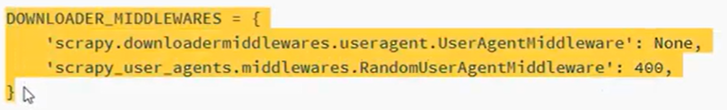
 
 - finally we can modify the proxi (the IPs). To do so we have to use scrapy-proxy-pool and follow the next instructions 

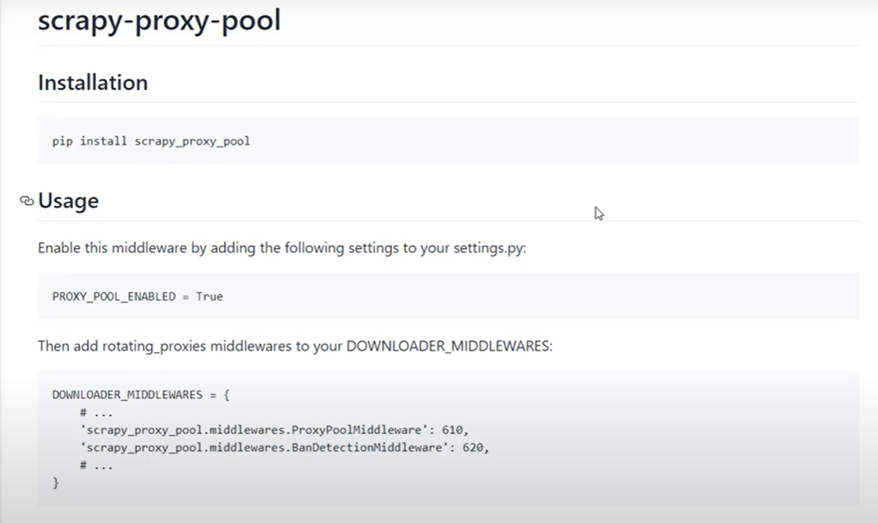

We will be using the first method, modifying the USER_AGENT.

We overwrite the setting file with the new USER_AGENT

In [80]:
%%writefile "C:\Users\34645\Documents\S12Webscrapping\amazon\amazon\settings.py"


# Scrapy settings for amazon project
#
# For simplicity, this file contains only settings considered important or
# commonly used. You can find more settings consulting the documentation:
#
#     https://docs.scrapy.org/en/latest/topics/settings.html
#     https://docs.scrapy.org/en/latest/topics/downloader-middleware.html
#     https://docs.scrapy.org/en/latest/topics/spider-middleware.html

BOT_NAME = 'amazon'

SPIDER_MODULES = ['amazon.spiders']
NEWSPIDER_MODULE = 'amazon.spiders'

# Crawl responsibly by identifying yourself (and your website) on the user-agent
#USER_AGENT = 'amazon (+http://www.yourdomain.com)'
USER_AGENT = 'https://developers.whatismybrowser.com/useragents/parse/79googlebot'

# Obey robots.txt rules
ROBOTSTXT_OBEY = True

# Configure maximum concurrent requests performed by Scrapy (default: 16)
#CONCURRENT_REQUESTS = 32

# Configure a delay for requests for the same website (default: 0)
# See https://docs.scrapy.org/en/latest/topics/settings.html#download-delay
# See also autothrottle settings and docs
#DOWNLOAD_DELAY = 3
# The download delay setting will honor only one of:
#CONCURRENT_REQUESTS_PER_DOMAIN = 16
#CONCURRENT_REQUESTS_PER_IP = 16

# Disable cookies (enabled by default)
#COOKIES_ENABLED = False

# Disable Telnet Console (enabled by default)
#TELNETCONSOLE_ENABLED = False

# Override the default request headers:
#DEFAULT_REQUEST_HEADERS = {
#   'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
#   'Accept-Language': 'en',
#}

# Enable or disable spider middlewares
# See https://docs.scrapy.org/en/latest/topics/spider-middleware.html
#SPIDER_MIDDLEWARES = {
#    'amazon.middlewares.AmazonSpiderMiddleware': 543,
#}

# Enable or disable downloader middlewares
# See https://docs.scrapy.org/en/latest/topics/downloader-middleware.html
#DOWNLOADER_MIDDLEWARES = {
#    'amazon.middlewares.AmazonDownloaderMiddleware': 543,
#}

# Enable or disable extensions
# See https://docs.scrapy.org/en/latest/topics/extensions.html
#EXTENSIONS = {
#    'scrapy.extensions.telnet.TelnetConsole': None,
#}

# Configure item pipelines
# See https://docs.scrapy.org/en/latest/topics/item-pipeline.html
#ITEM_PIPELINES = {
#    'amazon.pipelines.AmazonPipeline': 300,
#}

# Enable and configure the AutoThrottle extension (disabled by default)
# See https://docs.scrapy.org/en/latest/topics/autothrottle.html
#AUTOTHROTTLE_ENABLED = True
# The initial download delay
#AUTOTHROTTLE_START_DELAY = 5
# The maximum download delay to be set in case of high latencies
#AUTOTHROTTLE_MAX_DELAY = 60
# The average number of requests Scrapy should be sending in parallel to
# each remote server
#AUTOTHROTTLE_TARGET_CONCURRENCY = 1.0
# Enable showing throttling stats for every response received:
#AUTOTHROTTLE_DEBUG = False

# Enable and configure HTTP caching (disabled by default)
# See https://docs.scrapy.org/en/latest/topics/downloader-middleware.html#httpcache-middleware-settings
#HTTPCACHE_ENABLED = True
#HTTPCACHE_EXPIRATION_SECS = 0
#HTTPCACHE_DIR = 'httpcache'
#HTTPCACHE_IGNORE_HTTP_CODES = []
#HTTPCACHE_STORAGE = 'scrapy.extensions.httpcache.FilesystemCacheStorage'


Overwriting C:\Users\34645\Documents\S12Webscrapping\amazon\amazon\settings.py


Finally we create the sprider that will extract the information.

In our case we will extract the first 5 pages of books from Amazon.

In [81]:
%%writefile "C:\Users\34645\Documents\S12Webscrapping\amazon\amazon\spiders\amazon_spider.py"

import scrapy
from ..items import AmazonItem

class AmazonSpider(scrapy.Spider):
    name = 'amazon'
    page_number = 2 # This is part of the code that will allow us change the page automatically
    # Most of the websites add 'Page 2' when you press the next button. We copy page 2 link and modify the number to 1 tp have the first page
    start_urls = [
        'https://www.amazon.es/gp/bestsellers/books/ref=zg_bs_pg_1?ie=UTF8&pg=1',
    ]

    def parse(self, response):
        
        items = AmazonItem()
        
        #I use Chrome Selector Gadget and the inspector to check the css paths required
        #This is the area were all the books information is contain.
        #In Amazon it does not contain only the books, but other ads and sections as well
        #books = response.css('div.p13n-desktop-grid') 
        books = response.css('.zg-grid-general-faceout')
        
        # To avoid having 3 large list of information, we decide to save in different columns the title, price and imagelink of each of the first 5 pages
        for book in books:        
            title = book.css('.a-link-normal span div::text').extract()
            #price = book.css('._p13n-zg-list-grid-desktop_price_p13n-sc-price__3mJ9Z selectorgadget_suggested::text()').extract()
            #price = book.xpath('//html/body/div[1]/div[3]/div/div/div[1]/div/div/div[2]/div[1]/div[1]/div[49]/div/div[2]/div/div[4]/a/span/span/text()').extract()
            price = book.xpath('//*[@id="gridItemRoot"]/div/div[2]/div/div[3]/a/span/span/text()').get()
            imagelink = book.css('.p13n-product-image::attr(src)').extract()
        
            # Save the info into a intermediate container
            items['title'] = title
            items['price'] = price
            items['imagelink'] = imagelink
        
            yield items
 

        # This will chage the page to extract the books from the next pages
        next_page = 'https://www.amazon.es/gp/bestsellers/books/ref=zg_bs_pg_1?ie=UTF8&pg='+ str(AmazonSpider.page_number) 
        
        # We limit the extraction to 3 pages
        if AmazonSpider.page_number < 3:
            AmazonSpider.page_number += 1
            yield response.follow(next_page, callback = self.parse) #change the page and call the class again to scrape it.

Overwriting C:\Users\34645\Documents\S12Webscrapping\amazon\amazon\spiders\amazon_spider.py


In [82]:
# Finally we need to run the spider from the command
# -o means outlet, save. followed by the file name that can be .json/.csv/.xml
!cd C:\Users\34645\Documents\S12Webscrapping\amazon\ && scrapy crawl amazon -o books.csv

2022-03-02 17:10:23 [scrapy.utils.log] INFO: Scrapy 2.5.1 started (bot: amazon)
2022-03-02 17:10:23 [scrapy.utils.log] INFO: Versions: lxml 4.6.3.0, libxml2 2.9.12, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 22.1.0, Python 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 21.0.0 (OpenSSL 1.1.1l  24 Aug 2021), cryptography 3.4.8, Platform Windows-10-10.0.19042-SP0
2022-03-02 17:10:23 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2022-03-02 17:10:23 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'amazon',
 'NEWSPIDER_MODULE': 'amazon.spiders',
 'ROBOTSTXT_OBEY': True,
 'SPIDER_MODULES': ['amazon.spiders'],
 'USER_AGENT': 'https://developers.whatismybrowser.com/useragents/parse/79googlebot'}
2022-03-02 17:10:23 [scrapy.extensions.telnet] INFO: Telnet Password: 2acb72fc4670ce2d
2022-03-02 17:10:23 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions

           '(Jóvenes influencers)']}
2022-03-02 17:10:24 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.amazon.es/gp/bestsellers/books/ref=zg_bs_pg_1?ie=UTF8&pg=1>

{'imagelink': ['https://images-eu.ssl-images-amazon.com/images/I/71hHAjSYR3L._AC_UL302_SR302,200_.jpg'],
 'price': None,
 'title': ['El poder del ahora: una guía para la iluminación espiritual '
           '(Perenne)']}
2022-03-02 17:10:24 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.amazon.es/gp/bestsellers/books/ref=zg_bs_pg_1?ie=UTF8&pg=1>

{'imagelink': ['https://images-eu.ssl-images-amazon.com/images/I/71OzOdID0-L._AC_UL302_SR302,200_.jpg'],
 'price': None,
 'title': ['Antes de diciembre (Wattpad)']}
2022-03-02 17:10:24 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.amazon.es/gp/bestsellers/books/ref=zg_bs_pg_1?ie=UTF8&pg=1>

{'imagelink': ['https://images-eu.ssl-images-amazon.com/images/I/81GE7b3CDUL._AC_UL302_SR302,200_.jpg'],
 'price': None,
 'title': ['El gran salto: Con la col

In [83]:
DATA_DIR = r'C:\Users\34645\Documents\S12Webscrapping\amazon\\'
df = pd.read_csv(DATA_DIR + 'books.csv')


{'imagelink': ['https://images-eu.ssl-images-amazon.com/images/I/91yPNzXuN5L._AC_UL302_SR302,200_.jpg'],
 'price': None,
 'title': ['Compas 5. Los Compas perdidos en el espacio (4You2)']}
2022-03-02 17:10:25 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.amazon.es/gp/bestsellers/books/ref=zg_bs_pg_1?ie=UTF8&pg=2>

{'imagelink': ['https://images-eu.ssl-images-amazon.com/images/I/91KwdvW6EEL._AC_UL302_SR302,200_.jpg'],
 'price': None,
 'title': ['Nada (Contemporánea)']}
2022-03-02 17:10:25 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.amazon.es/gp/bestsellers/books/ref=zg_bs_pg_1?ie=UTF8&pg=2>

{'imagelink': ['https://images-eu.ssl-images-amazon.com/images/I/71x8z0yPlCL._AC_UL302_SR302,200_.jpg'],
 'price': None,
 'title': ['Hitler y Stalin: Dos dictadores y la segunda guerra mundial '
           '(Memoria Crítica)']}
2022-03-02 17:10:25 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.amazon.es/gp/bestsellers/books/ref=zg_bs_pg_1?ie=UTF8&pg=2>

{'imag

In [84]:
df

,imagelink,price,title
0,https://images-eu.ssl-images-amazon.com/images...,NaN,Fulgor (Serie Crave 4) (Planeta Internacional)
1,https://images-eu.ssl-images-amazon.com/images...,NaN,Por si las voces vuelven (No Ficción)
2,https://images-eu.ssl-images-amazon.com/images...,NaN,Casa de cielo y aliento (Ciudad Medialuna 2)
3,https://images-eu.ssl-images-amazon.com/images...,NaN,Encuentra tu persona vitamina (F. COLECCION)
4,https://images-eu.ssl-images-amazon.com/images...,NaN,Cocina keto: 100 recetas tradicionales adaptad...
...,...,...,...
196,https://images-eu.ssl-images-amazon.com/images...,NaN,Manual de una auténtica mamarracha (Fuera de C...
197,https://images-eu.ssl-images-amazon.com/images...,NaN,Ikigai: Los secretos de Japón para una vida la...
198,https://images-eu.ssl-images-amazon.com/images...,NaN,Guía visual del mundo Pokémon (Colección Pokémon)
199,https://images-eu.ssl-images-amazon.com/images...,NaN,Juegos y desafíos (Colección Pokémon)
